In [14]:
%reload_ext autoreload
%autoreload 2

In [15]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles

In [16]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [17]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict)

2025-06-28 07:08:01 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


In [18]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [19]:
lonlat_dataset.run(**run_dict)

2025-06-28 07:08:01 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for 2t
2025-06-28 07:08:02 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-06-28 07:08:02 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-06-28 07:08:02 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-06-28 07:08:02 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-06-28 07:08:02 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-06-28 07:08:02 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-06-28 07:08:02 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-06-28 07:08:16 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-06-28 07:08:16 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-06-28 07:08:16 :: Regridder :: INFO     -> Grid name: lon-lat
2025-06-28 

In [20]:
lonlat_dataset

In [21]:
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

In [22]:
single_month = lonlat_dataset.monthly.isel(time=0)
#single_month = lonlat_dataset.monthly.sel(time='1990-01-31')
single_annual = lonlat_dataset.annual.isel(time=0)
#single_annual = lonlat_dataset.annual.sel(time='1990-12-31')

In [23]:

plot_dict = {'monthly_data': single_month,
             'annual_data': single_annual,
             'loglevel': 'INFO'}

2025-06-28 07:08:18 :: create_folder :: INFO     -> Folder ./png already exists
2025-06-28 07:08:18 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png
2025-06-28 07:08:18 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png


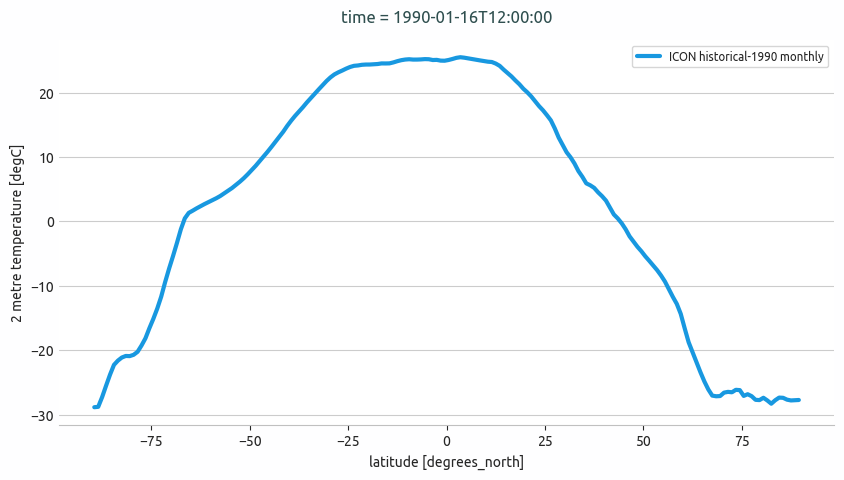

In [24]:
plot = PlotLatLonProfiles(**plot_dict)
data_labels = plot.set_data_labels()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_lat_lon_profiles(data_labels=data_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)

In [25]:
# Compute seasonal and annual means
lonlat_dataset.compute_seasonal_and_annual_means()

2025-06-28 07:08:18 :: LatLonProfiles :: INFO     -> Computing seasonal and annual means from monthly data
2025-06-28 07:08:18 :: TimStat :: INFO     -> Computing seasonal means...
2025-06-28 07:08:18 :: TimStat :: INFO     -> Computing annual mean...
2025-06-28 07:08:18 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully


2025-06-28 07:08:18 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles
2025-06-28 07:08:18 :: PlotLatLonProfiles :: INFO     -> Plotting seasonal and annual means using multiple_lines


2025-06-28 07:08:19 :: PlotLatLonProfiles :: WARNING  -> Metadata not available, using default values for saving
2025-06-28 07:08:19 :: create_folder :: INFO     -> Folder ./png already exists
2025-06-28 07:08:21 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.lat_lon_profiles_seasonal.unknown_catalog.unknown_model.unknown_exp.2t.png
2025-06-28 07:08:21 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.lat_lon_profiles_seasonal.unknown_catalog.unknown_model.unknown_exp.2t.png
2025-06-28 07:08:21 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


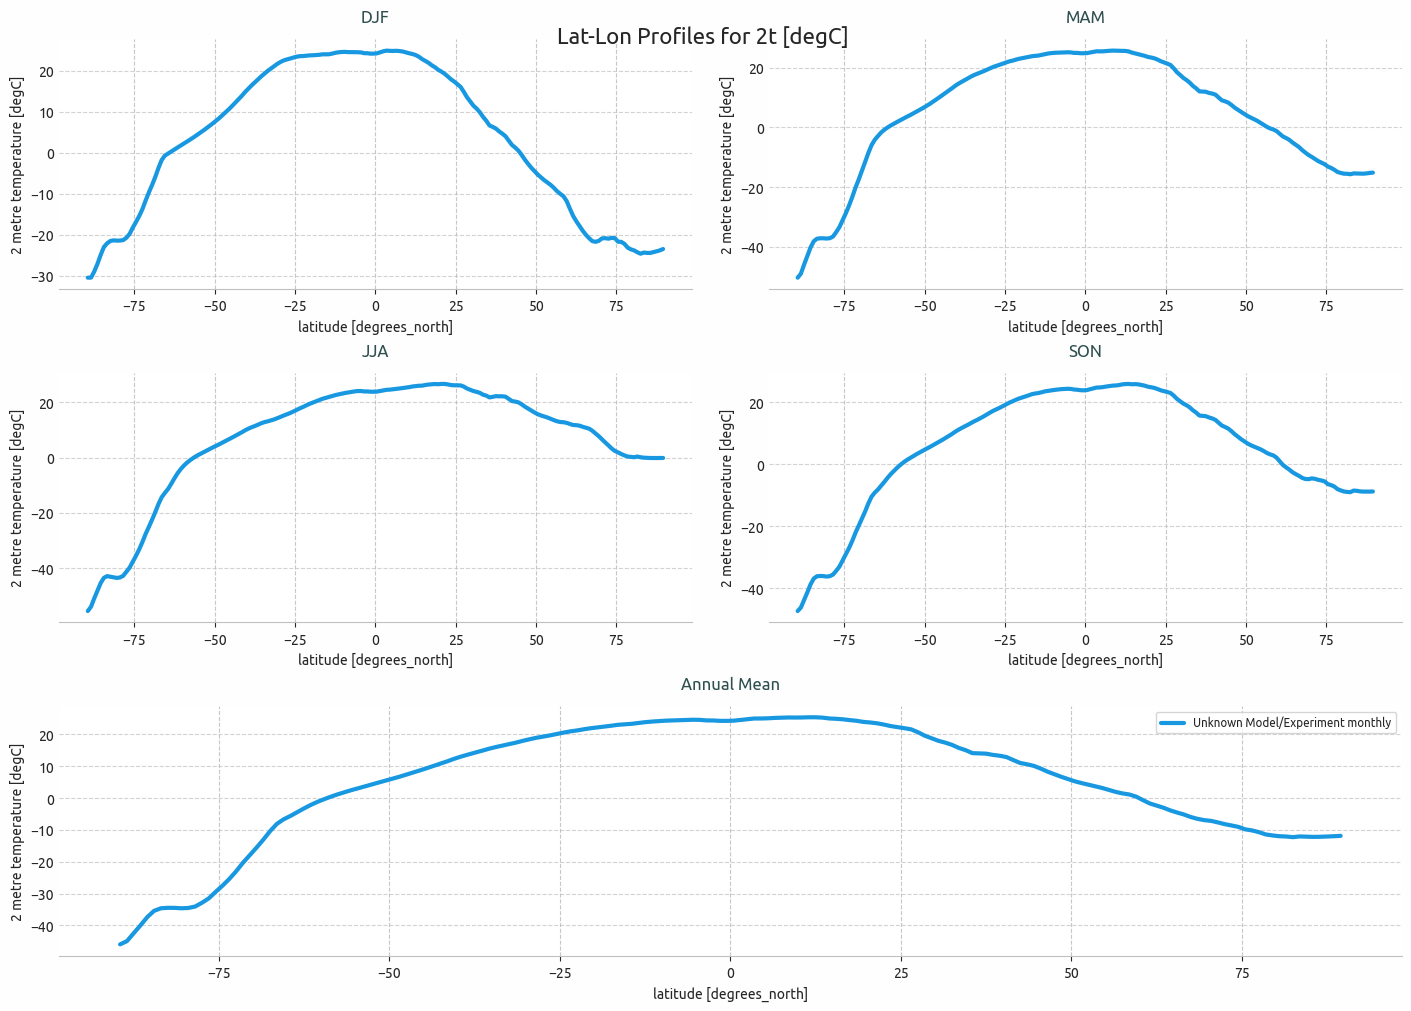

In [26]:
# Plot seasonal (DJF, MAM, JJA, SON, Annual)
seasonal_plot = PlotLatLonProfiles(seasonal_annual_data=lonlat_dataset.seasonal_annual_means, loglevel='INFO')
seasonal_plot.run(var=run_dict['var'], units=run_dict['units'], plot_type='seasonal')